**Variables:**
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 0 fully paid, 1 not fully paid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#2007-2010 LendingClub data
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<Figure size 1440x720 with 0 Axes>

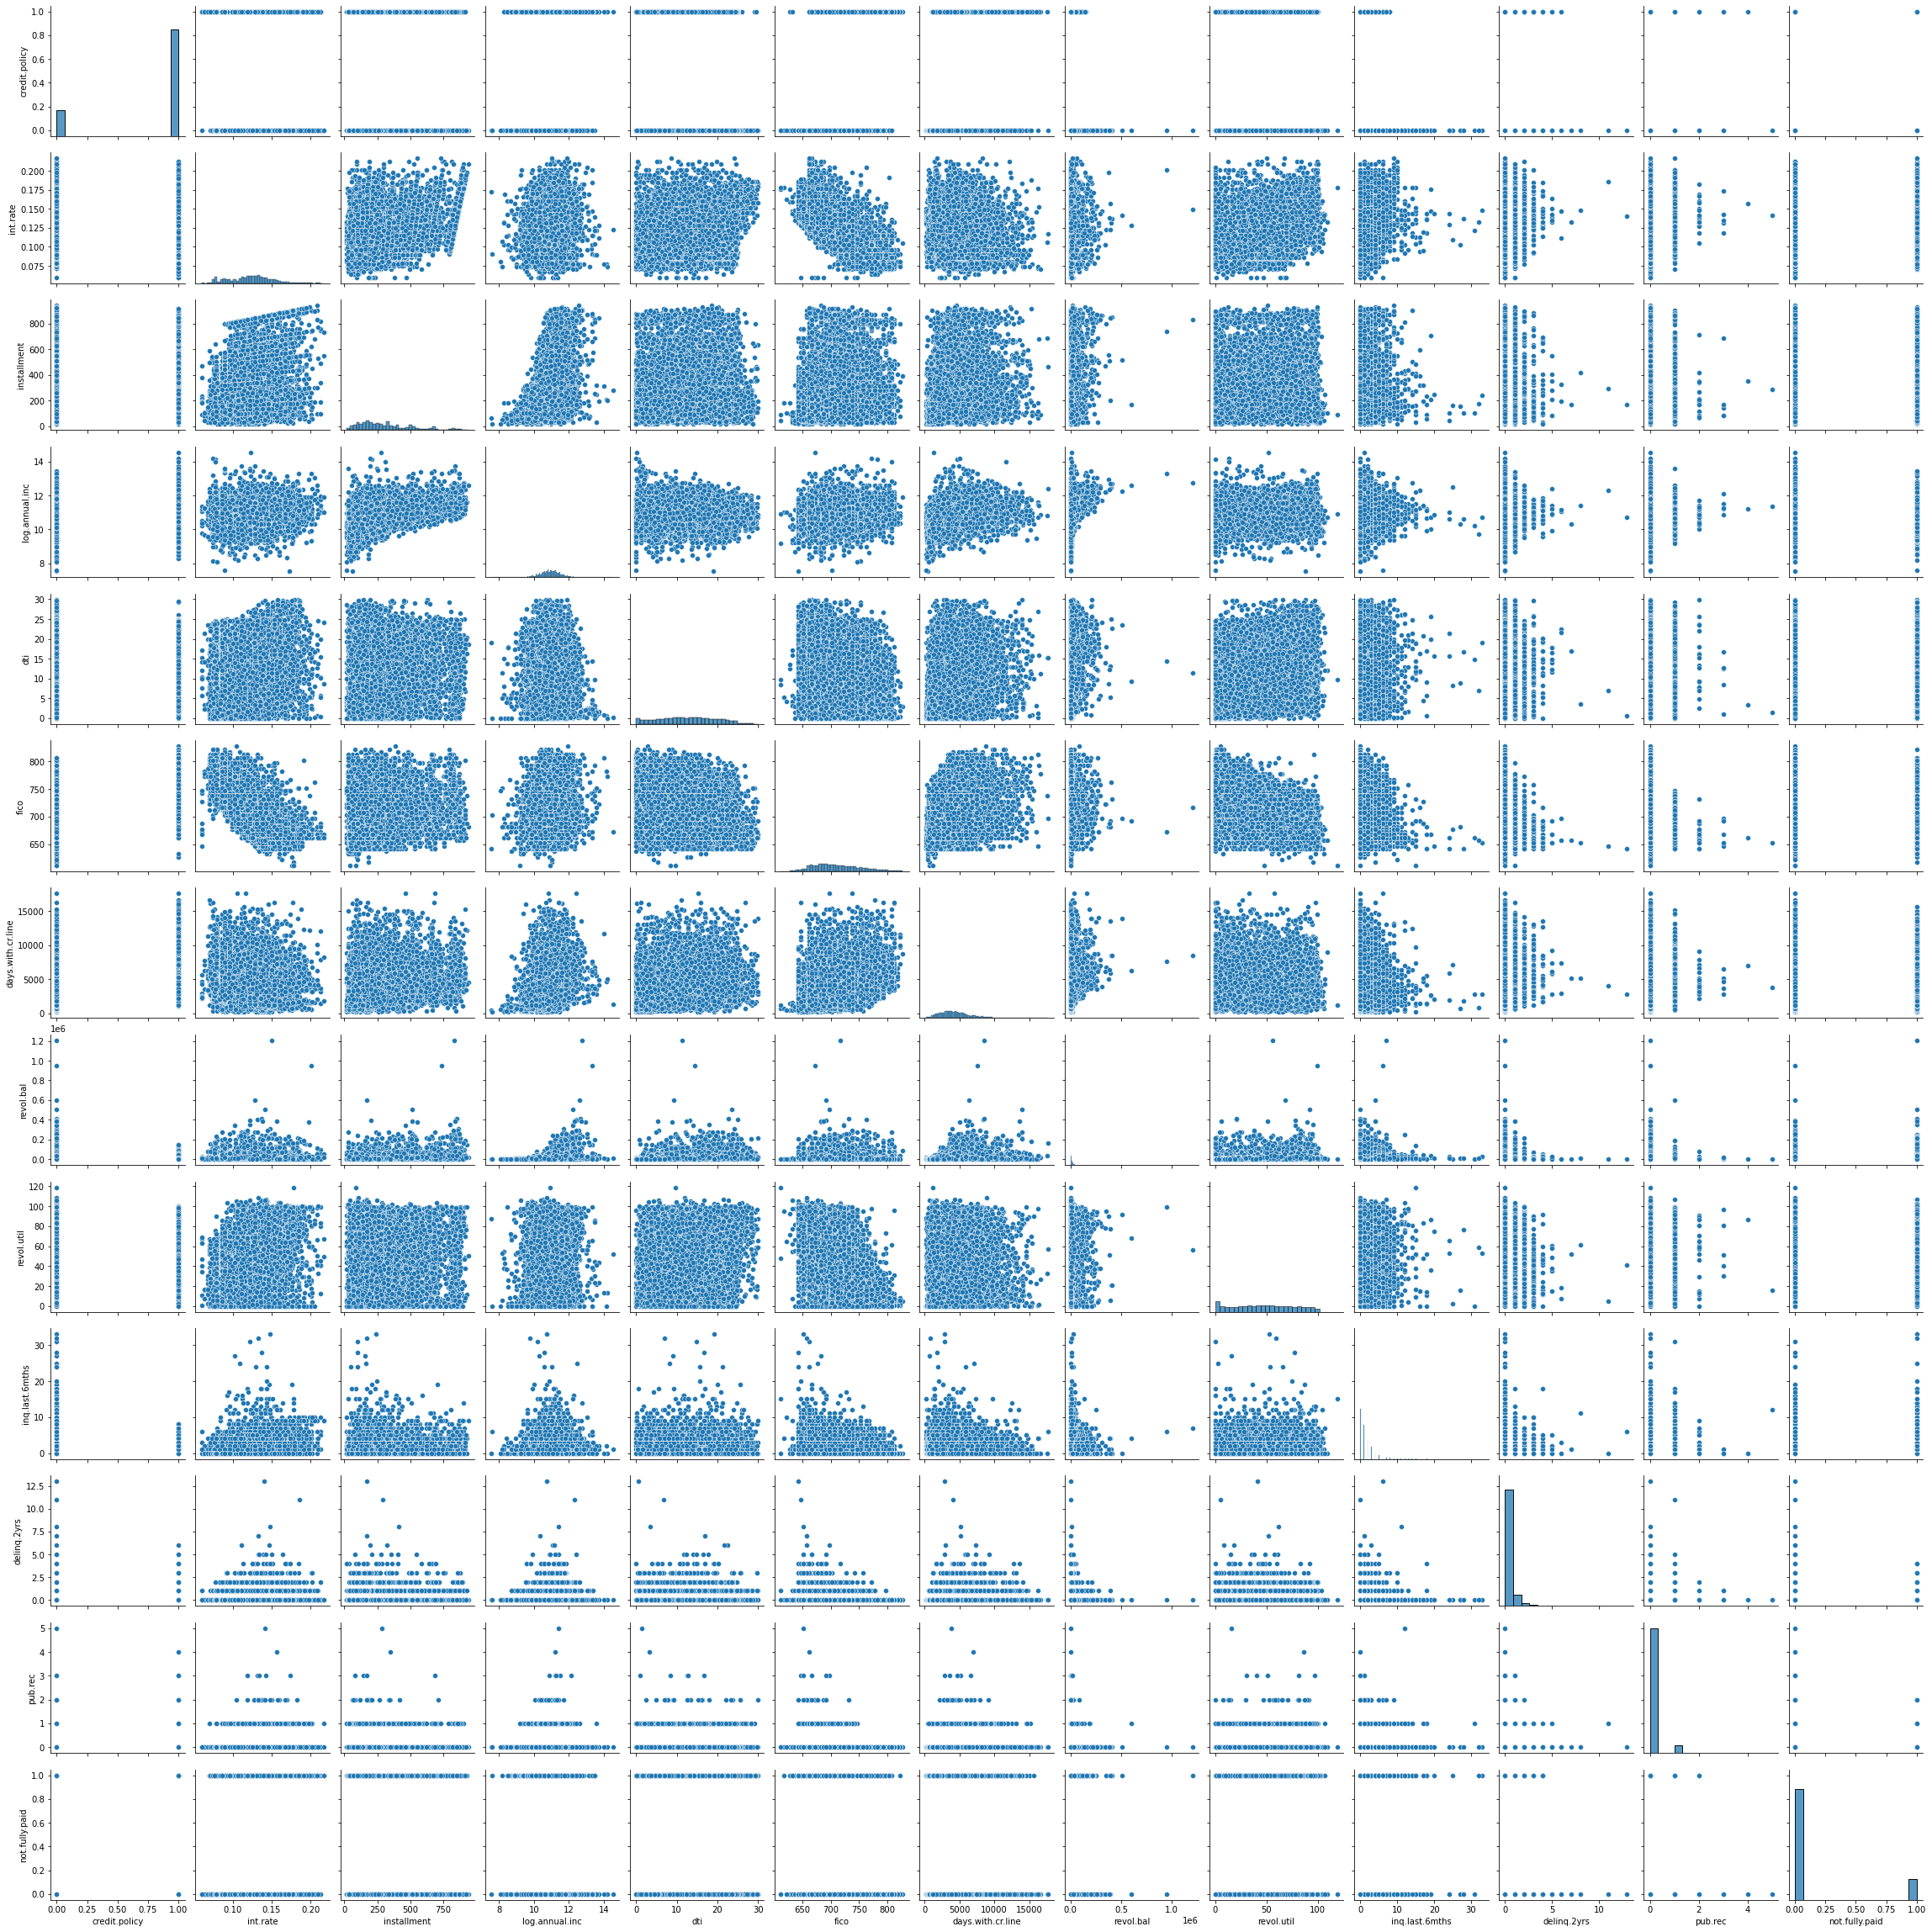

In [7]:
plt.figure(figsize=(20,10))
sns.pairplot(df)

In [8]:
df['credit.policy'].value_counts('0')

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

<AxesSubplot:xlabel='purpose', ylabel='count'>

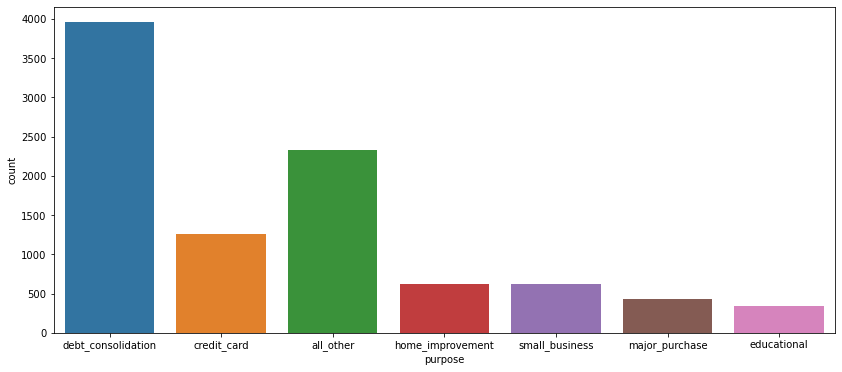

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['purpose'])

In [10]:
df['purpose'].value_counts('0')

debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: purpose, dtype: float64

<AxesSubplot:xlabel='purpose', ylabel='count'>

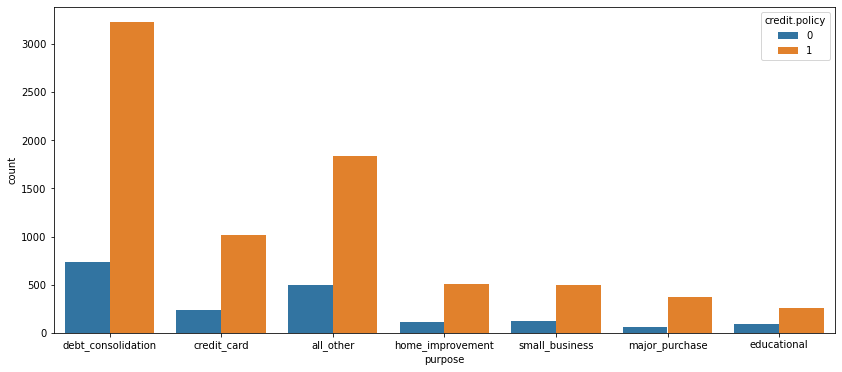

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(data = df, x='purpose', hue='credit.policy')

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

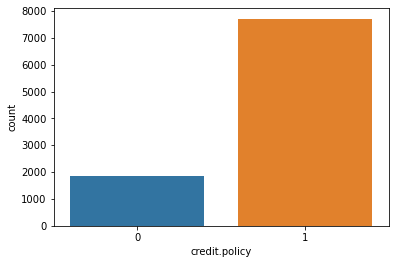

In [12]:
sns.countplot(x=df['credit.policy'])

<AxesSubplot:xlabel='int.rate', ylabel='Count'>

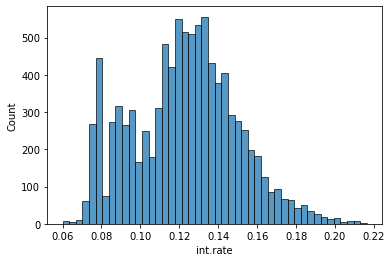

In [13]:
sns.histplot(x=df['int.rate'])

In [14]:
df['int.rate'].mean()

0.12264006055543955

In [15]:
df['int.rate'].median()

0.1221

<AxesSubplot:ylabel='int.rate'>

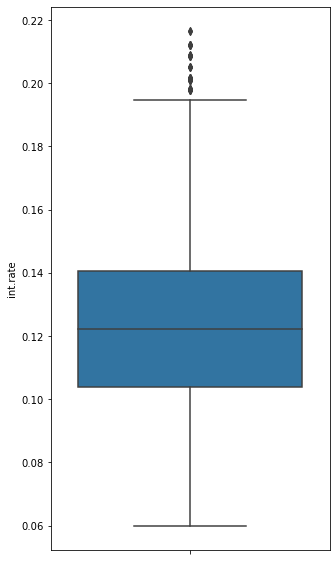

In [16]:
plt.figure(figsize=(5,10))
sns.boxplot(y=df['int.rate'])

<AxesSubplot:xlabel='fico', ylabel='Count'>

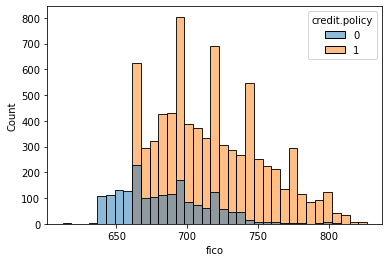

In [17]:
sns.histplot(data = df, x='fico', hue='credit.policy', bins=35)

<AxesSubplot:xlabel='fico', ylabel='Count'>

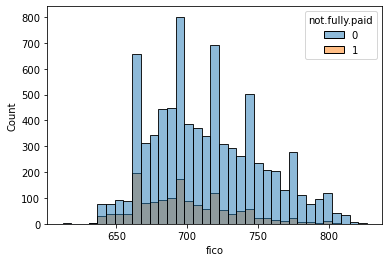

In [113]:
sns.histplot(data = df, x='fico', hue='not.fully.paid', bins=35)

<AxesSubplot:xlabel='purpose', ylabel='count'>

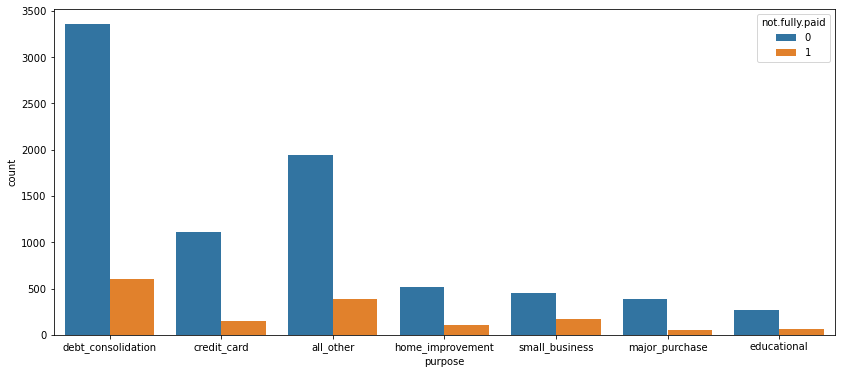

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(data =df, x='purpose', hue='not.fully.paid')

<AxesSubplot:xlabel='fico', ylabel='count'>

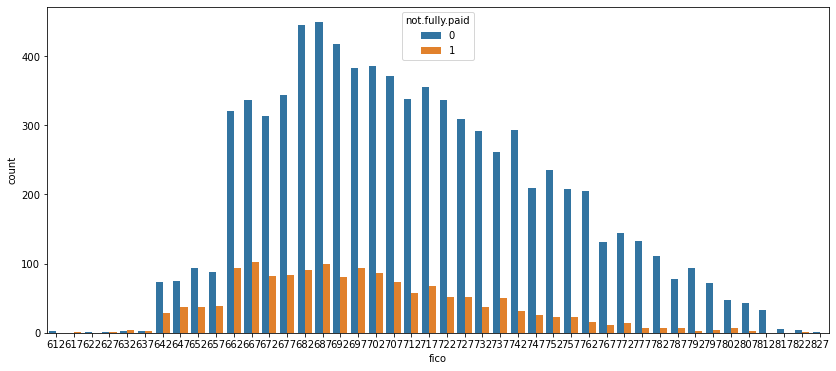

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(data =df, x='fico', hue='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='Count'>

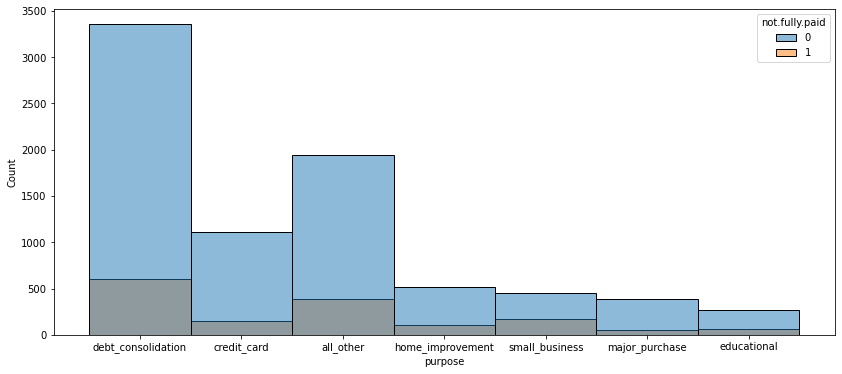

In [21]:
plt.figure(figsize=(14,6))
sns.histplot(data =df, x='purpose', hue='not.fully.paid')

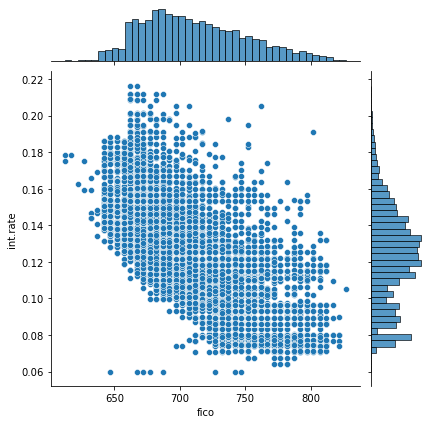

In [22]:
sns.jointplot(data = df, y='int.rate', x='fico')

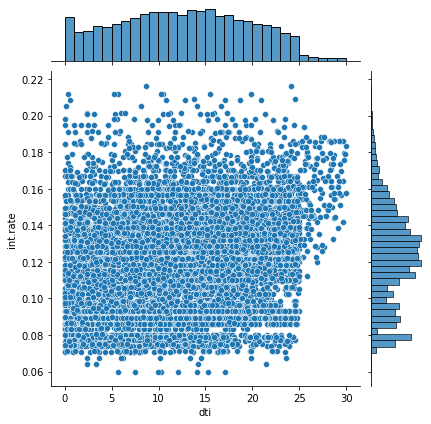

In [23]:
sns.jointplot(data = df, y='int.rate', x='dti')

<AxesSubplot:xlabel='dti', ylabel='Count'>

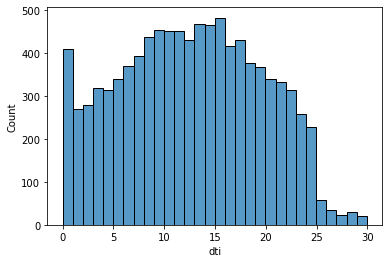

In [24]:
sns.histplot(data=df['dti'])

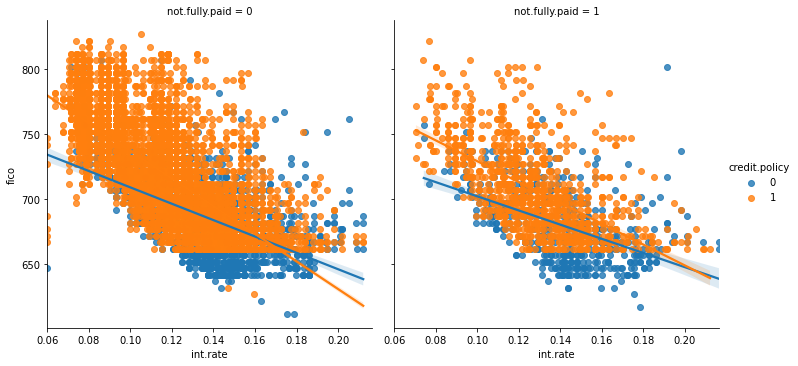

In [28]:
sns.lmplot(data = df, x ='int.rate', y = 'fico', 
           hue='credit.policy', col ='not.fully.paid')

In [33]:
df_final = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [103]:
X = df_final.drop('credit.policy', axis =1)
y = df_final['credit.policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [104]:
randf = RandomForestClassifier(n_estimators = 300)

In [105]:
randf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [106]:
y_pred_rf = randf.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       528
           1       0.99      1.00      0.99      2346

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [108]:
dectree = DecisionTreeClassifier()

In [109]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
y_pred_dt = dectree.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       528
           1       0.99      0.99      0.99      2346

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

In [85]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred_knn = knn.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.53      0.21      0.30       540
           1       0.84      0.96      0.89      2334

    accuracy                           0.82      2874
   macro avg       0.68      0.58      0.60      2874
weighted avg       0.78      0.82      0.78      2874

[[ 115  425]
 [ 102 2232]]


In [75]:
df['credit.policy'].value_counts("0")

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

In [99]:
X = df_final.drop('not.fully.paid', axis =1)
y = df_final['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
randf.fit(X_train, y_train)
y_pred_rf = randf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2422
           1       0.36      0.01      0.02       452

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.77      0.84      0.77      2874

[[2415    7]
 [ 448    4]]


In [101]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2422
           1       0.17      0.05      0.07       452

    accuracy                           0.81      2874
   macro avg       0.50      0.50      0.48      2874
weighted avg       0.74      0.81      0.77      2874

[[ 435 1987]
 [  97  355]]


In [102]:
dectree.fit(X_train, y_train)
y_pred_dt = dectree.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2422
           1       0.20      0.24      0.22       452

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

[[1987  435]
 [ 345  107]]


In [112]:
df_final.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0